In [1]:
#import useful package 
from proj1_helpers import *
from ridge_regression import *
from split_data import *
from gradient_descent import *
from costs import *
from build_polynomial import *
from cross_validation import *
from least_squares import *
from plots import *
import numpy as np

In [2]:
#import the data
yb,inputdata,ids=load_csv_data("train.csv")

# Model 1 (without sparse data columns)

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
#Take only the columns that are not sparce
l = [np.count_nonzero(np.transpose(inputdata)[i] ==-999)==0 for i in range (30)]
xfilter = np.transpose(np.transpose(inputdata)[l])

In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

[  1.00000000e-20   1.04811313e-19   1.09854114e-18   1.15139540e-17
   1.20679264e-16   1.26485522e-15   1.32571137e-14   1.38949549e-13
   1.45634848e-12   1.52641797e-11   1.59985872e-10   1.67683294e-09
   1.75751062e-08   1.84206997e-07   1.93069773e-06   2.02358965e-05
   2.12095089e-04   2.22299648e-03   2.32995181e-02   2.44205309e-01
   2.55954792e+00   2.68269580e+01   2.81176870e+02   2.94705170e+03
   3.08884360e+04   3.23745754e+05   3.39322177e+06   3.55648031e+07
   3.72759372e+08   3.90693994e+09   4.09491506e+10   4.29193426e+11
   4.49843267e+12   4.71486636e+13   4.94171336e+14   5.17947468e+15
   5.42867544e+16   5.68986603e+17   5.96362332e+18   6.25055193e+19
   6.55128557e+20   6.86648845e+21   7.19685673e+22   7.54312006e+23
   7.90604321e+24   8.28642773e+25   8.68511374e+26   9.10298178e+27
   9.54095476e+28   1.00000000e+30]
[0.79401328267671412, 0.79401328267671412, 0.79401328267671412, 0.79401328267671412, 0.79401334790987566, 0.79401383412100246, 0.7940132

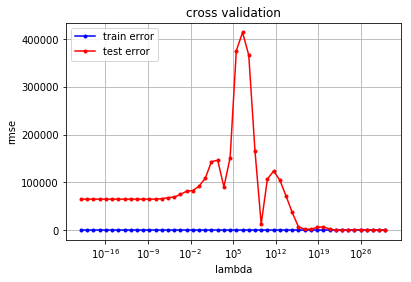

In [79]:
def cross_validation_demo():
    seed = 2
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-20, 30, 50)
    # split data in k fold
    k_indices = build_k_indices(yb, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
  
    for lambda_ in lambdas:
        
        avgtrain = 0
        avgtest = 0
        
        for k in range(k_fold):
            loss_tr , loss_te = cross_validation(yb, xfilter, k_indices, k, lambda_, degree)
            avgtrain += (1/k_fold)*loss_tr
            avgtest += (1/k_fold)*loss_te
        
        rmse_tr.append(np.sqrt(2*avgtrain))
        rmse_te.append(np.sqrt(2*avgtest))

    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

In [31]:
def accuracy(y, tx, w):
    """Calculate the accuracy of a prediction
    """
    pred=predict_labels(w,tx)
    e=y-pred
    return 1-(sum(abs(e/2))/len(e))


In [29]:
lambda_=3.79269019e+09
x_train,x_test,y_train,y_test=split_data(xfilter, yb, 0.9, 1)
polytrain=build_poly(x_train,10)
polytest=build_poly(x_test,6)
w=ridge_regression(y_train,polytrain,0)
accuracy(y_train,polytrain,w)


0.601511111111


250000
0


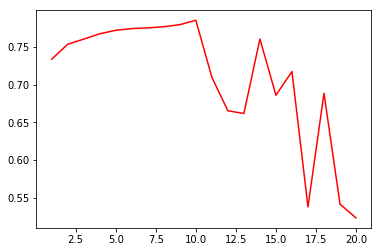

In [46]:
x_train,x_test,y_train,y_test=split_data(xfilter, yb, 1, 1)
print(len(x_train))
print(len(x_test))
degree=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
rmse_tr=[]
rmse_te=[]
for d in degree:
    polytrain=build_poly(x_train,d)
    #polytest=build_poly(x_test,degree)
    w=least_squares(y_train,polytrain)
    rmse_tr.append(accuracy(y_train,polytrain,w))
    #rmse_te.append(accuracy(y_test,polytest,w))
plt.plot(degree, rmse_tr, 'r') 
#plt.plot(degree, rmse_te, 'b')
plt.show()


In [49]:
print(rmse_tr[9])

0.785268


In [50]:
polytrain=build_poly(x,10)
w=least_squares(yb,polytrain)
accuracy(yb,polytrain,w)

0.76308399999999998